In [5]:
# Load libraries
import pandas as pd
from itertools import groupby
from __future__ import division
import operator
import matplotlib.pyplot as plt
import matplotlib.cm
% matplotlib inline
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.colors import Normalize
import numpy as np
import seaborn as sns
import math

In [6]:
data = pd.read_csv("india.csv")

In [7]:
data.shape

(640, 118)

In [8]:
data.head()

,District code,State name,District name,Population,Male,Female,Literate,Male_Literate,Female_Literate,SC,...,Power_Parity_Rs_90000_150000,Power_Parity_Rs_45000_150000,Power_Parity_Rs_150000_240000,Power_Parity_Rs_240000_330000,Power_Parity_Rs_150000_330000,Power_Parity_Rs_330000_425000,Power_Parity_Rs_425000_545000,Power_Parity_Rs_330000_545000,Power_Parity_Above_Rs_545000,Total_Power_Parity
0,1,JAMMU AND KASHMIR,Kupwara,870354,474190,396164,439654,282823,156831,1048,...,94,588,71,101,172,74,10,84,15,1119
1,2,JAMMU AND KASHMIR,Badgam,753745,398041,355704,335649,207741,127908,368,...,126,562,72,89,161,96,28,124,18,1066
2,3,JAMMU AND KASHMIR,Leh(Ladakh),133487,78971,54516,93770,62834,30936,488,...,46,122,15,22,37,20,14,34,17,242
3,4,JAMMU AND KASHMIR,Kargil,140802,77785,63017,86236,56301,29935,18,...,27,114,12,18,30,19,3,22,7,214
4,5,JAMMU AND KASHMIR,Punch,476835,251899,224936,261724,163333,98391,556,...,78,346,35,50,85,59,8,67,12,629


In [9]:
data.describe()

,District code,Population,Male,Female,Literate,Male_Literate,Female_Literate,SC,Male_SC,Female_SC,...,Power_Parity_Rs_90000_150000,Power_Parity_Rs_45000_150000,Power_Parity_Rs_150000_240000,Power_Parity_Rs_240000_330000,Power_Parity_Rs_150000_330000,Power_Parity_Rs_330000_425000,Power_Parity_Rs_425000_545000,Power_Parity_Rs_330000_545000,Power_Parity_Above_Rs_545000,Total_Power_Parity
count,640.000000,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,...,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000
mean,320.500000,1.891961e+06,9.738598e+05,9.181011e+05,1.193186e+06,6.793182e+05,5.138675e+05,3.146537e+05,1.617739e+05,1.528798e+05,...,786.046875,1696.456250,294.000000,215.300000,509.300000,194.204688,261.245313,455.450000,279.631250,3315.412500
std,184.896367,1.544380e+06,8.007785e+05,7.449864e+05,1.068583e+06,5.924144e+05,4.801816e+05,3.129818e+05,1.611216e+05,1.520336e+05,...,1038.854733,1720.535151,638.345281,362.684243,968.538748,424.108001,587.279450,1007.364839,1050.934537,4638.568719
min,1.000000,8.004000e+03,4.414000e+03,3.590000e+03,4.436000e+03,2.614000e+03,1.822000e+03,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000
25%,160.750000,8.178610e+05,4.171682e+05,4.017458e+05,4.825982e+05,2.764365e+05,2.008920e+05,8.320850e+04,4.230700e+04,4.267175e+04,...,236.750000,589.000000,59.000000,24.750000,95.000000,19.000000,21.000000,44.000000,18.000000,1024.250000
50%,320.500000,1.557367e+06,7.986815e+05,7.589200e+05,9.573465e+05,5.483525e+05,4.038590e+05,2.460160e+05,1.255485e+05,1.178550e+05,...,518.000000,1220.500000,149.000000,118.500000,278.000000,84.000000,85.500000,186.500000,60.500000,2238.500000
75%,480.250000,2.583551e+06,1.338604e+06,1.264277e+06,1.602260e+06,9.188582e+05,6.641550e+05,4.477078e+05,2.284602e+05,2.140502e+05,...,941.250000,2233.250000,296.500000,262.000000,564.500000,213.250000,293.000000,497.000000,215.500000,3959.000000
max,640.000000,1.106015e+07,5.865078e+06,5.195070e+06,8.227161e+06,4.591396e+06,3.635765e+06,2.464032e+06,1.266504e+06,1.197528e+06,...,10334.000000,13819.000000,10835.000000,3595.000000,14430.000000,5027.000000,7597.000000,12624.000000,18289.000000,60163.000000


In [10]:
print (data.groupby('State name').size())

State name
ANDAMAN AND NICOBAR ISLANDS     3
ANDHRA PRADESH                 23
ARUNACHAL PRADESH              16
ASSAM                          27
BIHAR                          38
CHANDIGARH                      1
CHHATTISGARH                   18
DADRA AND NAGAR HAVELI          1
DAMAN AND DIU                   2
GOA                             2
GUJARAT                        26
HARYANA                        21
HIMACHAL PRADESH               12
JAMMU AND KASHMIR              22
JHARKHAND                      24
KARNATAKA                      30
KERALA                         14
LAKSHADWEEP                     1
MADHYA PRADESH                 50
MAHARASHTRA                    35
MANIPUR                         9
MEGHALAYA                       7
MIZORAM                         8
NAGALAND                       11
NCT OF DELHI                    9
ORISSA                         30
PONDICHERRY                     4
PUNJAB                         20
RAJASTHAN                      33
SIK

In [11]:
states = data.groupby('State name')

In [12]:
states.describe()

Age not stated                              \
                                     count          mean           std   
State name                                                               
ANDAMAN AND NICOBAR ISLANDS            3.0    122.666667    136.269341   
ANDHRA PRADESH                        23.0  33540.478261  35106.871205   
ARUNACHAL PRADESH                     16.0     94.312500     73.541570   
ASSAM                                 27.0    697.185185    472.449186   
BIHAR                                 38.0  10618.473684  20879.575228   
CHANDIGARH                             1.0    346.000000           NaN   
CHHATTISGARH                          18.0   1284.166667   2604.544066   
DADRA AND NAGAR HAVELI                 1.0    372.000000           NaN   
DAMAN AND DIU                          2.0    178.000000    155.563492   
GOA                                    2.0   1047.000000    660.437734   
GUJARAT                               26.0   9186.307692  11347.347358   
HARYANA                               21.0   1501.619048   1302.605753   
HIMACHAL PRADESH                      12.0    846.916667   1335.613339   
JAMMU AND KASHMIR                     22.0    687.227273    481.511601   
JHARKHAND                             24.0   4863.916667  11240.532240   
KARNATAKA                             30.0   1528.366667   2078.235334   
KERALA                                14.0   2463.285714   1337.319675   
LAKSHADWEEP                            1.0    115.000000           NaN   
MADHYA PRADESH                        50.0   1657.240000   2089.580893   
MAHARASHTRA                           35.0  11648.457143  11480.866539   
MANIPUR                                9.0    864.111111    503.592207   
MEGHALAYA                              7.0    826.285714    533.554344   
MIZORAM                                8.0     79.125000     64.341583   
NAGALAND                              11.0    133.727273    126.242696   
NCT OF DELHI                           9.0   1855.777778   1393.926538   
ORISSA                                30.0   3972.366667   2537.441509   
PONDICHERRY                            4.0    275.250000    283.044608   
PUNJAB                                20.0   2076.100000   1452.881706   
RAJASTHAN                             33.0   8169.757576   7527.244134   
SIKKIM                                 4.0    294.000000    213.639884   
TAMIL NADU                            32.0   2087.656250   1489.385251   
TRIPURA                                4.0    404.000000    381.035431   
UTTAR PRADESH                         71.0  22845.943662  23999.147485   
UTTARAKHAND                           13.0   1277.538462   1492.810694   
WEST BENGAL                           19.0   5918.473684   6070.423410   

                                                                           \
                                min      25%      50%       75%       max   
State name                                                                  
ANDAMAN AND NICOBAR ISLANDS    42.0    44.00     46.0    163.00     280.0   
ANDHRA PRADESH               2156.0  5231.00  20245.0  56104.50  135852.0   
ARUNACHAL PRADESH              17.0    52.00     76.5    118.75     313.0   
ASSAM                         110.0   371.50    550.0    930.50    2077.0   
BIHAR                         775.0  2386.50   3591.5   7404.00  107429.0   
CHANDIGARH                    346.0   346.00    346.0    346.00     346.0   
CHHATTISGARH                  149.0   214.75    334.0   1083.75   11234.0   
DADRA AND NAGAR HAVELI        372.0   372.00    372.0    372.00     372.0   
DAMAN AND DIU                  68.0   123.00    178.0    233.00     288.0   
GOA                           580.0   813.50   1047.0   1280.50    1514.0   
GUJARAT                       348.0  3593.25   5463.5   8940.50   53718.0   
HARYANA                       298.0   563.00   1266.0   1788.00    5259.0   
HIMACHAL PRADESH               87.0   251.50    368.5    769

In [13]:
literacy_rate = []

In [14]:
for key , group in states:
    total_state_pop = 0
    total_literate_pop = 0
    for row in group.iterrows():
        total_state_pop += row[1][3]
        total_literate_pop += row[1][6]
    
    rate = (total_literate_pop/total_state_pop)*100

    literacy_rate.append((key,rate))

In [15]:
print (literacy_rate)


[('ANDAMAN AND NICOBAR ISLANDS', 77.32414387475991), ('ANDHRA PRADESH', 59.77334542575791), ('ARUNACHAL PRADESH', 55.35810170647822), ('ASSAM', 61.45689155040753), ('BIHAR', 50.43691584466746), ('CHANDIGARH', 76.31228385996495), ('CHHATTISGARH', 60.20670499402666), ('DADRA AND NAGAR HAVELI', 64.94738281511395), ('DAMAN AND DIU', 77.45460375667531), ('GOA', 79.9075105670377), ('GUJARAT', 67.99068069374013), ('HARYANA', 65.47546646422207), ('HIMACHAL PRADESH', 73.41628837330991), ('JAMMU AND KASHMIR', 56.351669069128555), ('JHARKHAND', 55.55958090869887), ('KARNATAKA', 66.5310162908284), ('KERALA', 84.2237101824127), ('LAKSHADWEEP', 81.51164053169543), ('MADHYA PRADESH', 59.00186114469107), ('MAHARASHTRA', 72.5737700262924), ('MANIPUR', 66.8282095977511), ('MEGHALAYA', 60.16419893025995), ('MIZORAM', 77.30316822912015), ('NAGALAND', 67.85103072930934), ('NCT OF DELHI', 75.87450420513153), ('ORISSA', 63.71195527692738), ('PONDICHERRY', 76.71034085418282), ('PUNJAB', 67.42929419668246), ('

In [27]:
def state_map(arr, color='Ornges'):
    
    fig, ax = plt.subplots()

    m = Basemap(projection='merc',lat_0=54.5, lon_0=-4.36,llcrnrlon=68.1, llcrnrlat= 6.5, urcrnrlon=97.4, urcrnrlat=35.5)

    m.drawmapboundary(fill_color='#46bcec')

    m.fillcontinents(color='#f2f2f2',lake_color='#46bcec')

    m.drawcoastlines()
    m.readshapefile('./state/state', 'INDIA')

    lit_rate = []
    # Iterate through all rows of INDIA_info file
    # Each row is a dictionary. Here, we try to map state name with literacy rate
    for state_info in m.INDIA_info:
        # Get the state in uppercase, as our csv file has state names in upper case
        state = state_info['ST_NAME'].upper()
        # initialize rate = 0
        rate = 0

        # In literacy_rate (containing tuples of state name and literacy rates), search for state 'state'
        # Append its corresponding literacy rate to lit_rate
        for x in literacy_rate:
            if x[0] == state:
                rate = x[1]
                break
        lit_rate.append(rate)            

    # Create a dataframe containing shapes, state names and literacy rates    
    df_poly = pd.DataFrame({
            'shapes': [Polygon(np.array(shape), True) for shape in m.INDIA],
            'area': [area['ST_NAME'] for area in m.INDIA_info],
            'lit_rate' : lit_rate
        })

    '''
    STEP 5 : USING DATA TO COLOR AREAS
    '''
    # Get all the shapes
    shapes = [Polygon(np.array(shape), True) for shape in m.INDIA]
    # Create a colormap
    cmap = plt.get_cmap(color)   
    # Create a patch collection. Create patches on the top of the map, not beneath it (zorder=2)
    pc = PatchCollection(shapes, zorder=2)

    norm = Normalize()
    # Set color according to the literacy rate of the state
    pc.set_facecolor(cmap(norm(df_poly['lit_rate'].fillna(0).values)))
    ax.add_collection(pc)

    # Create a mapper to map color intensities to values
    mapper = matplotlib.cm.ScalarMappable(cmap=cmap)
    mapper.set_array(lit_rate)
    plt.colorbar(mapper, shrink=0.4)

    # Change plot size and font size
    plt.rcParams['figure.figsize'] = (15,15)
    plt.rcParams.update({'font.size': 20})
    plt.show()

/usr/local/Cellar/python3/3.6.4/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()


ValueError: Colormap Ornges is not recognized. Possible values are: Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Vega10, Vega10_r, Vega20, Vega20_r, Vega20b, Vega20b_r, Vega20c, Vega20c_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spectral, spectral_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r

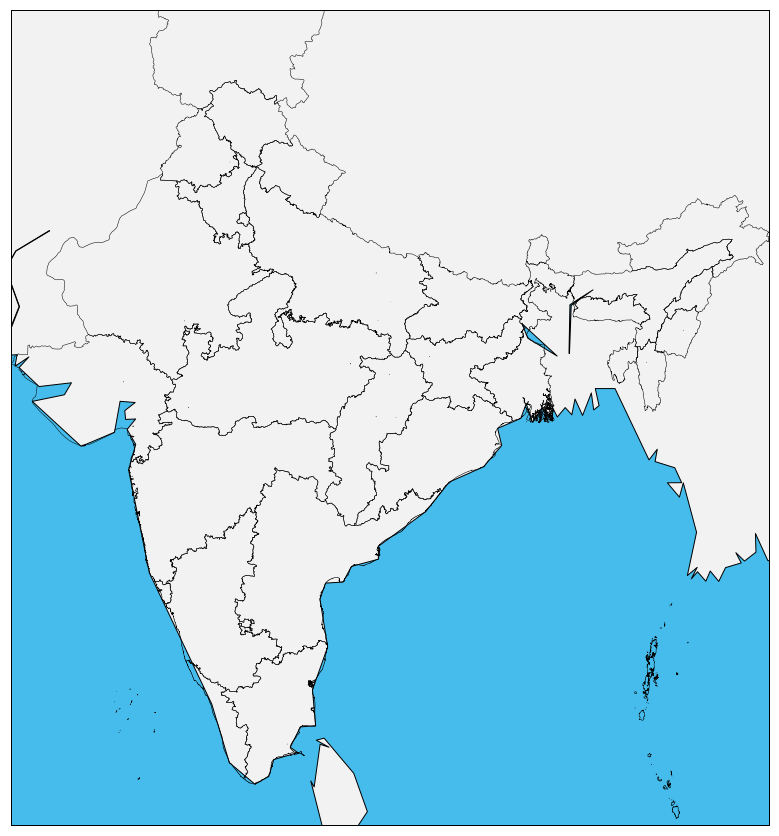

In [28]:
state_map(literacy_rate)